# 1. 전처리(Preprocessing)

**Tokenizer()** : 토큰화와 정수 인코딩을 위해 사용

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer()
train_text='The earth is an awesome place live'

# 단어 집합 생성
tokenizer.fit_on_texts([train_text])

# 정수 인코딩
sub_text='The earth is an great place live'
sequences=tokenizer.texts_to_sequences([sub_text])[0]

print('정수 인코딩 :', sequences)
print('단어 집합 :', tokenizer.word_index)

정수 인코딩 : [1, 2, 3, 4, 6, 7]
단어 집합 : {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


**pad_sequences()** : 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해진 길이보다 길이가 짧은 샘플은 값을 0으로 채운다.

In [2]:
pad_sequences([[1, 2, 3],[3, 4, 5, 6],[7, 8]], maxlen=3, padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]])

- **첫번째 인자** : 패딩을 진행할 데이터  
- **maxlen** : 모든 데이터에 대해서 정규화 할 길이  
- **padding** : 'pre'를 선택하면 앞에 0을 채우고, 'post'를 선택하면 뒤에 0을 채운다.  

# 2. 워드 임베딩(Word Embedding)

- **워드 임베딩** : 단어를 밀집 벡터로 만드는 작업
- 임베딩 벡터 : 워드 임베딩 과정을 통해 나온 결과 = 밀집 벡터
- 초기에는 랜던값을 가지지만, 인공 신경망의 가중치가 학습되는 방법과 같은 방식으로 값이 학습되면 변경

|-|원-핫 벡터|임베딩 벡터|
|:---:|:---:|:---:|
|차원|고차원(단어 집합의 크기)|저차원|
|다른 표현|대부분의 값이 0인 희소 벡터|모든 값이 실수인 밀집 벡터|
|표현 방법|수동|훈련 데이터로부터 학습|
|값의 타입|1과 0|실수|

**Embedding()** : 임베딩 층을 만드는 역할

```python
# 1. 토큰화
tokenized_text = [['Hope', 'to', 'see', 'you', 'soon'], ['Nice', 'to', 'see', 'you', 'again']]

# 2. 각 단어에 대한 정수 인코딩
encoded_text = [[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 3. 위 정수 인코딩 데이터가 아래의 임베딩 층의 입력이 된다.
vocab_size = 7
embedding_dim = 2
Embedding(vocab_size, embedding_dim, input_length=5)

# 각 정수는 아래의 테이블의 인덱스로 사용되며 Embedding()은 각 단어마다 임베딩 벡터를 리턴한다.
+------------+------------+
|   index    | embedding  |
+------------+------------+
|     0      | [1.2, 3.1] |
|     1      | [0.1, 4.2] |
|     2      | [1.0, 3.1] |
|     3      | [0.3, 2.1] |
|     4      | [2.2, 1.4] |
|     5      | [0.7, 1.7] |
|     6      | [4.1, 2.0] |
+------------+------------+

# 위의 표는 임베딩 벡터가 된 결과를 예로서 정리한 것이고 Embedding()의 출력인 3D 텐서를 보여주는 것이 아님
```

- **첫번째 인자** : 단어의 집합의 크기, 즉, 총 단어의 개수
- **두번째 인자** : 임베딩 벡터의 출력 차원. 결과로서 나오는 임베딩 벡터의 크기
- **input_length** : 입력 시퀀스의 길이

# 3. 모델링(Modeling)

**Sequential()**

```python

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(...) # 층 추가
```

Embedding()을 통해 임베딩 층 추가 예시

```python
model=Sequential()
model.add(Embedding(vocab_size, output_dim, input_length))
```

전결합층 추가 예시

```python
model=Sequential()
model.add(Dense(1, input_dim=3, activation='relu'))
```

- **첫번째 인자** : 출력 누런의 수
- **input_dim** : 입력 뉴런의 수
- **activation** : 활성화 함수
   - linear : 디폴트 값, 입력 뉴런과 가중치의 계산 결과 그대로 출력
   - sigmoid : 이진 분류 문제
   - softmax : 다중 클래스 분류 문제
   - relu : 은닉층에서 주로 사용

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

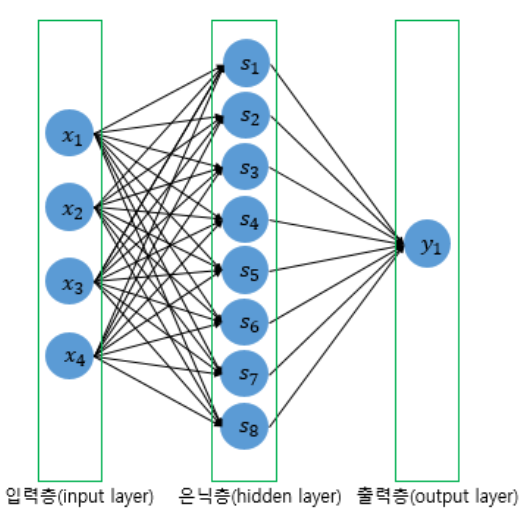

**summary** : 모델의 정보를 요약

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


# 4. 컴파일(Compile)과 훈련(Training)

**compile()** : 모델을 기계가 이해할 수 있도록 컴파일

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding

vocab_size=10000
embedding_dim=32
hidden_units=32

model=Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])

- **optimizer** : 훈련 과정을 설정하는 옵티마이저
- **loss** : 훈련 과정에서 사용할 손실 함수
- **metrics** : 훈련을 모니터링하기 위한 지표

|문제 유형|손실 함수명|출력층의 활성화 함수명|
|:---:|:---:|:---:|
|회귀 문제|mean_squared_error|-|
|다중 클래스 분류|categorical_crossentropy|소프트맥스|
|다중 클래스 분류|sparse_categorical_crossentropy|소프트맥스|
|이진 분류|binary_crossentropy|시그모이드|

**fit()** : 모델을 학습

```python
model.fit(X_train, y_train, epochs=10, batch_size=32)
```

- **첫번째 인자** : 훈련 데이터
- **두번째 인자** : 레이블 데이터
- **epochs** : 총 훈련 횟수
- **batch_size** : 배치 크기, 기본값은 32, 미니 배치 경사 하강법을 사용하고 싶지 않은 경우에는 batch_size=None

```python
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))
```

- **validation_data(X_val, y_val)** : 검증 데이터를 사용

```python
# 훈련 데이터의 20%를 검증 데이터로 사용.
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2))
```

- **validation_split** : 훈련 데이터와 훈련 데이터의 레이블에서 일정 비율 분리하여 이를 검증 데이터로 사용

- **verbose** : 학습 중 출력되는 문구 설정
   - 0 : 아무것도 출력하지 않는다.
   - 1 : 훈련의 진행도를 보여주는 진행 막대를 보여준다.
   - 2 : 미니 배치마다 손실 정보를 출력
   
```python
# verbose = 1일 경우.
Epoch 88/100
7/7 [==============================] - 0s 143us/step - loss: 0.1029 - acc: 1.0000

# verbose = 2일 경우.
Epoch 88/100
 - 0s - loss: 0.1475 - acc: 1.0000
```

# 5. 평가(Evaluation)과 예측(Prediction)

**evaluate()** : 테스트 데이터를 통한 학습한 모델에 대한 정확도 평가

```python
model.evaluate(X_test, y_test, batch_size=32)
```

- **첫번째 인자** : 테스트 데이터
- **두번째 인자** : 레이블 테스트 데이터
- **batch_size** : 배치 크기

**predict()** : 임의의 입력에 대한 모델의 출력값을 확인

```python
model.predict(X_input, batch_size=32)
```

- **첫번째 인자** : 예측하고자 하는 데이터
- **batch_size** : 배치 크기

# 6. 모델의 저장(Save)과 로드(Load)

**save()** : 인공 신경망 모델을 hdf5 파일에 저장

```python
model.save('model_name.h5')
```

**load_model()** : 저장해둔 모델 불러온다.

```python
from tensorflow.keras.model import load_model
model=load_model('model_name.h5')
```